# **Importing Modules**

In [1]:
from skimage import feature, io
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import imageio
import imageio.v2 as imageio
import cv2
import glob
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from sklearn.svm import SVC

# **Taking dataset**

In [2]:
datasetpath = 'grape'

converting dataset to batchs by tensorflow pipeline

In [3]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3000 files belonging to 3 classes.


# **conveting dataset to GLCM**

In [4]:
from skimage import io
from sklearn import preprocessing
# from skimage.feature.graycoprops import greycoprops
def glcm_feature(img):
    S = preprocessing.MinMaxScaler((0,11)).fit_transform(img).astype(int)
    Grauwertmatrix = feature.graycomatrix(S, [1,2,3], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=12, symmetric=False, normed=True)

    ContrastStats = feature.graycoprops(Grauwertmatrix, 'contrast')
    CorrelationtStats = feature.graycoprops(Grauwertmatrix, 'correlation')
    HomogeneityStats = feature.graycoprops(Grauwertmatrix, 'homogeneity')
    ASMStats = feature.graycoprops(Grauwertmatrix, 'ASM')
    fea =[np.mean(ContrastStats), np.mean(CorrelationtStats),np.mean(ASMStats), np.mean(HomogeneityStats)]
    return fea
    


In [5]:
dataseth = []
datalabel = []
featureo =[]
for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
#         img = image_batch[i].numpy().astype("uint8")
        img = image_batch[i].numpy().astype("uint8")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(256,256))
#         (H, hogImage) = feature.hog(gI1, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), transform_sqrt=True, visualize=True,channel_axis=2)
        glcm = glcm_feature(gI1)
        image = np.array(glcm).flatten()
        dataseth.append(image)
        featureo.append(glcm)
        datalabel.append(labels_batch[i])

# **Implementing SVM**

Epoch 1/2000
77/77 [==============================] - 0s 2ms/step - loss: 1.0714 - accuracy: 0.4154 - val_loss: 1.0475 - val_accuracy: 0.4963
Epoch 2/2000
77/77 [==============================] - 0s 1ms/step - loss: 1.0240 - accuracy: 0.4752 - val_loss: 1.0124 - val_accuracy: 0.4870
Epoch 3/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.9942 - accuracy: 0.4980 - val_loss: 1.0047 - val_accuracy: 0.5037
Epoch 4/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.9833 - accuracy: 0.4939 - val_loss: 1.0111 - val_accuracy: 0.4926
Epoch 5/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.9845 - accuracy: 0.4850 - val_loss: 0.9989 - val_accuracy: 0.4852
Epoch 6/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.9803 - accuracy: 0.5028 - val_loss: 0.9996 - val_accuracy: 0.5019
Epoch 7/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.9813 - accuracy: 0.4963 - val_loss: 1.0026 - val_accuracy: 0.4722
Epoch 

77/77 [==============================] - 0s 1ms/step - loss: 0.7645 - accuracy: 0.6736 - val_loss: 0.7644 - val_accuracy: 0.6574
Epoch 116/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7683 - accuracy: 0.6740 - val_loss: 0.7759 - val_accuracy: 0.6519
Epoch 117/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7677 - accuracy: 0.6622 - val_loss: 0.7604 - val_accuracy: 0.6722
Epoch 118/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.6699 - val_loss: 0.7634 - val_accuracy: 0.6704
Epoch 119/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7594 - accuracy: 0.6679 - val_loss: 0.8136 - val_accuracy: 0.6463
Epoch 120/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7660 - accuracy: 0.6638 - val_loss: 0.7666 - val_accuracy: 0.6759
Epoch 121/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7593 - accuracy: 0.6711 - val_loss: 0.7617 - val_accuracy: 0.6722
Epoch 1

Epoch 172/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7588 - accuracy: 0.6715 - val_loss: 0.7672 - val_accuracy: 0.6667
Epoch 173/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.6732 - val_loss: 0.7590 - val_accuracy: 0.6722
Epoch 174/2000
77/77 [==============================] - 0s 973us/step - loss: 0.7603 - accuracy: 0.6715 - val_loss: 0.7584 - val_accuracy: 0.6630
Epoch 175/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7579 - accuracy: 0.6768 - val_loss: 0.7747 - val_accuracy: 0.6667
Epoch 176/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.6748 - val_loss: 0.7949 - val_accuracy: 0.6574
Epoch 177/2000
77/77 [==============================] - 0s 997us/step - loss: 0.7507 - accuracy: 0.6797 - val_loss: 0.7588 - val_accuracy: 0.6722
Epoch 178/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7546 - accuracy: 0.6772 - val_loss: 0.7613 - val_accur

Epoch 229/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7490 - accuracy: 0.6789 - val_loss: 0.7553 - val_accuracy: 0.6722
Epoch 230/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7593 - accuracy: 0.6756 - val_loss: 0.7802 - val_accuracy: 0.6500
Epoch 231/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7511 - accuracy: 0.6736 - val_loss: 0.7561 - val_accuracy: 0.6722
Epoch 232/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7548 - accuracy: 0.6785 - val_loss: 0.7983 - val_accuracy: 0.6407
Epoch 233/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7547 - accuracy: 0.6744 - val_loss: 0.8087 - val_accuracy: 0.6481
Epoch 234/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.6829 - val_loss: 0.7541 - val_accuracy: 0.6667
Epoch 235/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.6789 - val_loss: 0.7944 - val_accuracy:

Epoch 286/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.6715 - val_loss: 0.7708 - val_accuracy: 0.6704
Epoch 287/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7448 - accuracy: 0.6833 - val_loss: 0.7549 - val_accuracy: 0.6685
Epoch 288/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7528 - accuracy: 0.6695 - val_loss: 0.7649 - val_accuracy: 0.6704
Epoch 289/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7523 - accuracy: 0.6793 - val_loss: 0.7662 - val_accuracy: 0.6574
Epoch 290/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7484 - accuracy: 0.6744 - val_loss: 0.7564 - val_accuracy: 0.6722
Epoch 291/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7474 - accuracy: 0.6789 - val_loss: 0.8021 - val_accuracy: 0.6389
Epoch 292/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7559 - accuracy: 0.6756 - val_loss: 0.7537 - val_accuracy:

Epoch 343/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7472 - accuracy: 0.6801 - val_loss: 0.7627 - val_accuracy: 0.6667
Epoch 344/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7463 - accuracy: 0.6797 - val_loss: 0.7497 - val_accuracy: 0.6648
Epoch 345/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.6703 - val_loss: 0.7898 - val_accuracy: 0.6444
Epoch 346/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7573 - accuracy: 0.6654 - val_loss: 0.7528 - val_accuracy: 0.6741
Epoch 347/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7427 - accuracy: 0.6801 - val_loss: 0.7562 - val_accuracy: 0.6685
Epoch 348/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7483 - accuracy: 0.6764 - val_loss: 0.7635 - val_accuracy: 0.6611
Epoch 349/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7472 - accuracy: 0.6732 - val_loss: 0.7534 - val_accuracy:

Epoch 400/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7392 - accuracy: 0.6829 - val_loss: 0.7457 - val_accuracy: 0.6704
Epoch 401/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7491 - accuracy: 0.6740 - val_loss: 0.7454 - val_accuracy: 0.6685
Epoch 402/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.6829 - val_loss: 0.7528 - val_accuracy: 0.6630
Epoch 403/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7435 - accuracy: 0.6821 - val_loss: 0.7447 - val_accuracy: 0.6667
Epoch 404/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7407 - accuracy: 0.6858 - val_loss: 0.7477 - val_accuracy: 0.6667
Epoch 405/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7429 - accuracy: 0.6821 - val_loss: 0.7464 - val_accuracy: 0.6685
Epoch 406/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7407 - accuracy: 0.6825 - val_loss: 0.7466 - val_accuracy:

Epoch 457/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7402 - accuracy: 0.6809 - val_loss: 0.7692 - val_accuracy: 0.6574
Epoch 458/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.6907 - val_loss: 0.7444 - val_accuracy: 0.6611
Epoch 459/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.6801 - val_loss: 0.7643 - val_accuracy: 0.6593
Epoch 460/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7395 - accuracy: 0.6805 - val_loss: 0.7438 - val_accuracy: 0.6630
Epoch 461/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7449 - accuracy: 0.6748 - val_loss: 0.7634 - val_accuracy: 0.6722
Epoch 462/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7342 - accuracy: 0.6837 - val_loss: 0.7495 - val_accuracy: 0.6704
Epoch 463/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7370 - accuracy: 0.6846 - val_loss: 0.7536 - val_accuracy:

Epoch 514/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.6793 - val_loss: 0.7724 - val_accuracy: 0.6611
Epoch 515/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.6862 - val_loss: 0.7489 - val_accuracy: 0.6704
Epoch 516/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.6862 - val_loss: 0.7363 - val_accuracy: 0.6667
Epoch 517/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7457 - accuracy: 0.6720 - val_loss: 0.7614 - val_accuracy: 0.6556
Epoch 518/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7511 - accuracy: 0.6740 - val_loss: 0.7547 - val_accuracy: 0.6815
Epoch 519/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.6813 - val_loss: 0.7648 - val_accuracy: 0.6593
Epoch 520/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7403 - accuracy: 0.6780 - val_loss: 0.7557 - val_accuracy:

Epoch 571/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7275 - accuracy: 0.6736 - val_loss: 0.7308 - val_accuracy: 0.6574
Epoch 572/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7293 - accuracy: 0.6854 - val_loss: 0.7550 - val_accuracy: 0.6648
Epoch 573/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.6809 - val_loss: 0.7421 - val_accuracy: 0.6815
Epoch 574/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.6882 - val_loss: 0.7373 - val_accuracy: 0.6667
Epoch 575/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.6833 - val_loss: 0.7697 - val_accuracy: 0.6611
Epoch 576/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.6793 - val_loss: 0.7633 - val_accuracy: 0.6537
Epoch 577/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.6801 - val_loss: 0.7315 - val_accuracy:

Epoch 628/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7276 - accuracy: 0.6878 - val_loss: 0.7770 - val_accuracy: 0.6500
Epoch 629/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7223 - accuracy: 0.6878 - val_loss: 0.7313 - val_accuracy: 0.6741
Epoch 630/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7251 - accuracy: 0.6862 - val_loss: 0.7796 - val_accuracy: 0.6463
Epoch 631/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7250 - accuracy: 0.6858 - val_loss: 0.7774 - val_accuracy: 0.6574
Epoch 632/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.6772 - val_loss: 0.7322 - val_accuracy: 0.6648
Epoch 633/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.6874 - val_loss: 0.7308 - val_accuracy: 0.6796
Epoch 634/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.6841 - val_loss: 0.7211 - val_accuracy:

Epoch 685/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.6854 - val_loss: 0.7296 - val_accuracy: 0.6741
Epoch 686/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.6886 - val_loss: 0.7251 - val_accuracy: 0.6722
Epoch 687/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.6898 - val_loss: 0.7200 - val_accuracy: 0.6704
Epoch 688/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.6833 - val_loss: 0.7442 - val_accuracy: 0.6667
Epoch 689/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.6841 - val_loss: 0.7404 - val_accuracy: 0.6630
Epoch 690/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.6870 - val_loss: 0.7172 - val_accuracy: 0.6759
Epoch 691/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7263 - accuracy: 0.6744 - val_loss: 0.7344 - val_accuracy:

Epoch 742/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.6894 - val_loss: 0.7255 - val_accuracy: 0.6815
Epoch 743/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.6821 - val_loss: 0.7356 - val_accuracy: 0.6630
Epoch 744/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6793 - val_loss: 0.7327 - val_accuracy: 0.6667
Epoch 745/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.6854 - val_loss: 0.7261 - val_accuracy: 0.6574
Epoch 746/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.6801 - val_loss: 0.7337 - val_accuracy: 0.6704
Epoch 747/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.6858 - val_loss: 0.7181 - val_accuracy: 0.6722
Epoch 748/2000
77/77 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.6809 - val_loss: 0.7144 - val_accuracy:

Epoch 799/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7167 - accuracy: 0.6841 - val_loss: 0.7141 - val_accuracy: 0.6778
Epoch 800/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.6858 - val_loss: 0.7152 - val_accuracy: 0.6741
Epoch 801/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7152 - accuracy: 0.6837 - val_loss: 0.7322 - val_accuracy: 0.6759
Epoch 802/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.6902 - val_loss: 0.7283 - val_accuracy: 0.6815
Epoch 803/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.6862 - val_loss: 0.7251 - val_accuracy: 0.6648
Epoch 804/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.6841 - val_loss: 0.7387 - val_accuracy: 0.6704
Epoch 805/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.6858 - val_loss: 0.7166 - val_accuracy:

Epoch 856/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7149 - accuracy: 0.6919 - val_loss: 0.7260 - val_accuracy: 0.6704
Epoch 857/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.6890 - val_loss: 0.7265 - val_accuracy: 0.6870
Epoch 858/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.6911 - val_loss: 0.7405 - val_accuracy: 0.6556
Epoch 859/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7152 - accuracy: 0.6801 - val_loss: 0.7155 - val_accuracy: 0.6778
Epoch 860/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.6911 - val_loss: 0.7123 - val_accuracy: 0.6741
Epoch 861/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.6780 - val_loss: 0.7498 - val_accuracy: 0.6574
Epoch 862/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.6915 - val_loss: 0.7136 - val_accuracy:

Epoch 913/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.6862 - val_loss: 0.7226 - val_accuracy: 0.6741
Epoch 914/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.6939 - val_loss: 0.7128 - val_accuracy: 0.6685
Epoch 915/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.6817 - val_loss: 0.7177 - val_accuracy: 0.6722
Epoch 916/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.6874 - val_loss: 0.7117 - val_accuracy: 0.6759
Epoch 917/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.6947 - val_loss: 0.7051 - val_accuracy: 0.6815
Epoch 918/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.6898 - val_loss: 0.7175 - val_accuracy: 0.6667
Epoch 919/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.6898 - val_loss: 0.7201 - val_accuracy:

Epoch 970/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.6959 - val_loss: 0.7205 - val_accuracy: 0.6815
Epoch 971/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.6927 - val_loss: 0.7383 - val_accuracy: 0.6759
Epoch 972/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.6874 - val_loss: 0.7247 - val_accuracy: 0.6741
Epoch 973/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.6813 - val_loss: 0.7112 - val_accuracy: 0.6722
Epoch 974/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.6780 - val_loss: 0.7519 - val_accuracy: 0.6685
Epoch 975/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.6976 - val_loss: 0.7225 - val_accuracy: 0.6778
Epoch 976/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.6927 - val_loss: 0.7280 - val_accuracy:

Epoch 1027/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.6931 - val_loss: 0.8053 - val_accuracy: 0.6352
Epoch 1028/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.6862 - val_loss: 0.7089 - val_accuracy: 0.6778
Epoch 1029/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6886 - val_loss: 0.7064 - val_accuracy: 0.6796
Epoch 1030/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.6959 - val_loss: 0.7120 - val_accuracy: 0.6704
Epoch 1031/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.6898 - val_loss: 0.7205 - val_accuracy: 0.6722
Epoch 1032/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.6886 - val_loss: 0.7144 - val_accuracy: 0.6741
Epoch 1033/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.6907 - val_loss: 0.7479 - val_ac

77/77 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.6976 - val_loss: 0.6973 - val_accuracy: 0.6759
Epoch 1140/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.6976 - val_loss: 0.7041 - val_accuracy: 0.6704
Epoch 1141/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.6911 - val_loss: 0.7155 - val_accuracy: 0.6722
Epoch 1142/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.6959 - val_loss: 0.7150 - val_accuracy: 0.6852
Epoch 1143/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.6951 - val_loss: 0.6996 - val_accuracy: 0.6741
Epoch 1144/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.6923 - val_loss: 0.7223 - val_accuracy: 0.6852
Epoch 1145/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.6931 - val_loss: 0.7123 - val_accuracy: 0.6741
E

77/77 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.6882 - val_loss: 0.7109 - val_accuracy: 0.6648
Epoch 1252/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.6931 - val_loss: 0.7072 - val_accuracy: 0.6704
Epoch 1253/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.6902 - val_loss: 0.7195 - val_accuracy: 0.6593
Epoch 1254/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.6927 - val_loss: 0.7112 - val_accuracy: 0.6852
Epoch 1255/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.6980 - val_loss: 0.6983 - val_accuracy: 0.6796
Epoch 1256/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.6967 - val_loss: 0.7063 - val_accuracy: 0.6741
Epoch 1257/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.6955 - val_loss: 0.6986 - val_accuracy: 0.6722
E

77/77 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.6976 - val_loss: 0.6983 - val_accuracy: 0.6759
Epoch 1364/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.6939 - val_loss: 0.6981 - val_accuracy: 0.6741
Epoch 1365/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.6967 - val_loss: 0.7244 - val_accuracy: 0.6741
Epoch 1366/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.6931 - val_loss: 0.7013 - val_accuracy: 0.6796
Epoch 1367/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.6963 - val_loss: 0.7103 - val_accuracy: 0.6778
Epoch 1368/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.6927 - val_loss: 0.6964 - val_accuracy: 0.6796
Epoch 1369/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.6939 - val_loss: 0.6970 - val_accuracy: 0.6759
E

77/77 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.6947 - val_loss: 0.6986 - val_accuracy: 0.6796
Epoch 1476/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.6927 - val_loss: 0.7319 - val_accuracy: 0.6759
Epoch 1477/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.6911 - val_loss: 0.7029 - val_accuracy: 0.6741
Epoch 1478/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.6963 - val_loss: 0.6962 - val_accuracy: 0.6870
Epoch 1479/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.6959 - val_loss: 0.7227 - val_accuracy: 0.6722
Epoch 1480/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.6907 - val_loss: 0.7132 - val_accuracy: 0.6889
Epoch 1481/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.6890 - val_loss: 0.7143 - val_accuracy: 0.6907
E

77/77 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.6984 - val_loss: 0.6959 - val_accuracy: 0.6685
Epoch 1588/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.6996 - val_loss: 0.6939 - val_accuracy: 0.6796
Epoch 1589/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.7016 - val_loss: 0.7067 - val_accuracy: 0.6685
Epoch 1590/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.7012 - val_loss: 0.7139 - val_accuracy: 0.6741
Epoch 1591/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.7049 - val_loss: 0.7100 - val_accuracy: 0.6704
Epoch 1592/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.6874 - val_loss: 0.7060 - val_accuracy: 0.6833
Epoch 1593/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.6980 - val_loss: 0.7127 - val_accuracy: 0.6704
E

77/77 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.7020 - val_loss: 0.6987 - val_accuracy: 0.6889
Epoch 1700/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.6976 - val_loss: 0.7073 - val_accuracy: 0.6796
Epoch 1701/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.7012 - val_loss: 0.7007 - val_accuracy: 0.6778
Epoch 1702/2000
77/77 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.6935 - val_loss: 0.7061 - val_accuracy: 0.6815
Epoch 1703/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.7004 - val_loss: 0.6933 - val_accuracy: 0.6889
Epoch 1704/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.7033 - val_loss: 0.6937 - val_accuracy: 0.6907
Epoch 1705/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6992 - val_loss: 0.7025 - val_accuracy: 0.6870
E

77/77 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.7004 - val_loss: 0.6905 - val_accuracy: 0.6907
Epoch 1812/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.7016 - val_loss: 0.6945 - val_accuracy: 0.6833
Epoch 1813/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6976 - val_loss: 0.7146 - val_accuracy: 0.6778
Epoch 1814/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.6988 - val_loss: 0.7075 - val_accuracy: 0.6926
Epoch 1815/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.7061 - val_loss: 0.6927 - val_accuracy: 0.6833
Epoch 1816/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.7008 - val_loss: 0.7093 - val_accuracy: 0.6778
Epoch 1817/2000
77/77 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.7016 - val_loss: 0.7052 - val_accuracy: 0.6648
E

77/77 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.7008 - val_loss: 0.6929 - val_accuracy: 0.6833
Epoch 1924/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.6959 - val_loss: 0.7024 - val_accuracy: 0.6889
Epoch 1925/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.6976 - val_loss: 0.6876 - val_accuracy: 0.6944
Epoch 1926/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.7065 - val_loss: 0.6917 - val_accuracy: 0.6815
Epoch 1927/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.7012 - val_loss: 0.6948 - val_accuracy: 0.6852
Epoch 1928/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.6976 - val_loss: 0.7067 - val_accuracy: 0.6722
Epoch 1929/2000
77/77 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6996 - val_loss: 0.6892 - val_accuracy: 0.6796
E

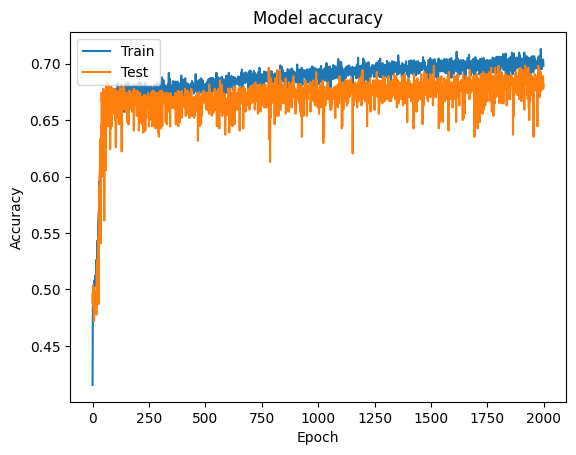

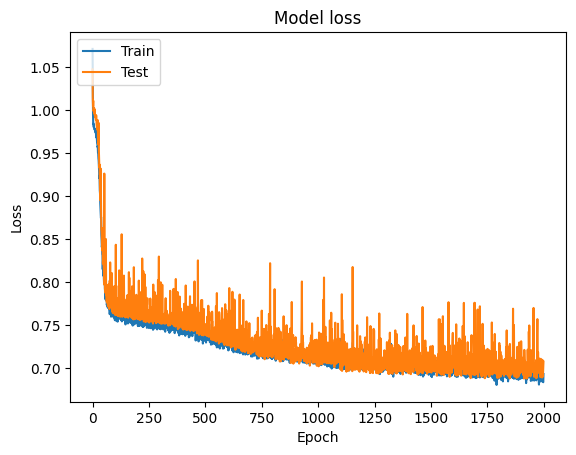

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

featureo = np.array(featureo)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(featureo,datalabel, test_size= 0.18)

# One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
# model = Sequential()
# model.add(Dense(64, input_shape=(4,), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

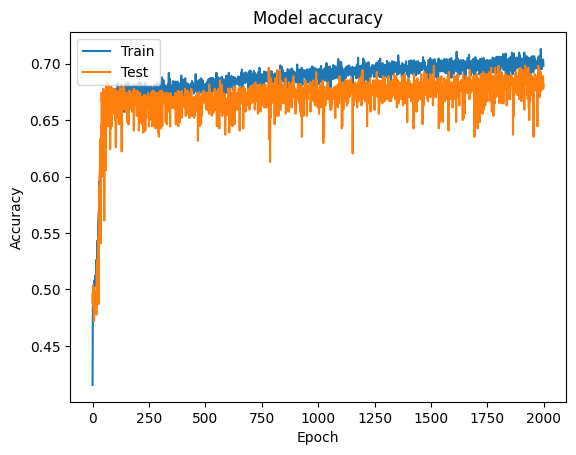

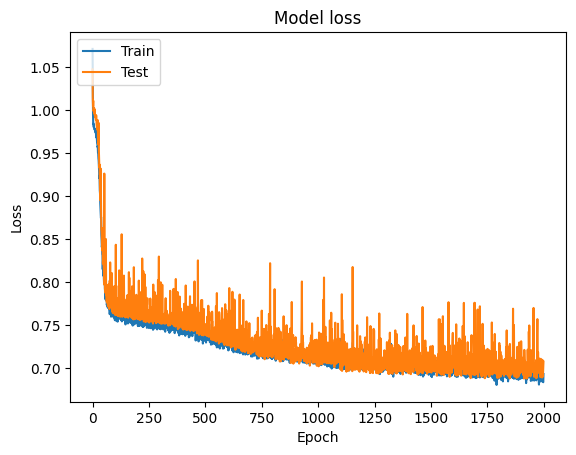

In [34]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
print(accuracy)

0.6611111111111111


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# y_train = np.argmax(y_train, axis=1)
# y_test = np.argmax(y_test, axis=1)


clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Generate the classification report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       177
           1       0.69      0.58      0.63       174
           2       0.67      0.66      0.66       189

    accuracy                           0.64       540
   macro avg       0.64      0.63      0.64       540
weighted avg       0.64      0.64      0.64       540

[[118  31  28]
 [ 41 101  32]
 [ 50  15 124]]


array([[120,  35,  33],
       [ 42,  83,  38],
       [ 48,  16, 125]])

[[118  31  28]
 [ 41 101  32]
 [ 50  15 124]]


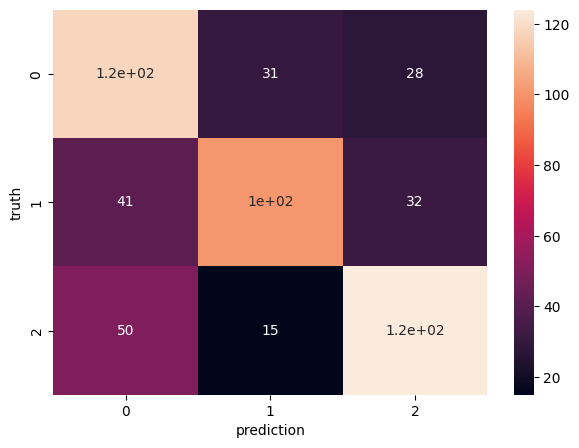

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')
print(conf_matrix)